In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
path ='../../BTC_data/elliptic_txs_classes.csv'

dirname = os.path.dirname(path)
PATH_TO_edgelist = os.path.join(dirname, "elliptic_txs_edgelist.csv")
PATH_TO_features = os.path.join(dirname, "elliptic_txs_features.csv")



### Working on 1000 rows and TxID as index

### Nodes and edges
The graph is made of 203,769 nodes and 234,355 edges. Two percent (4,545) of the nodes are labelled class1 (illicit). Twenty-one percent (42,019) are labelled class2 (licit). The remaining transactions are not labelled with regard to licit versus illicit.

### Features
There are 166 features associated with each node.


In [51]:
edgelist = pd.read_csv(PATH_TO_edgelist, index_col='txId1')#nrows=1000

classes = pd.read_csv(path,index_col='txId')

features = pd.read_csv(PATH_TO_features)#,index_col=0)
features.columns = ['id', 'time'] + [f'feature_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
features.set_index('id',inplace=True)

In [ ]:
classes.index.names = ['id']

In [109]:
df_classes = (pd.concat([features,classes],axis=1).dropna()[['time','feature_0','class']])

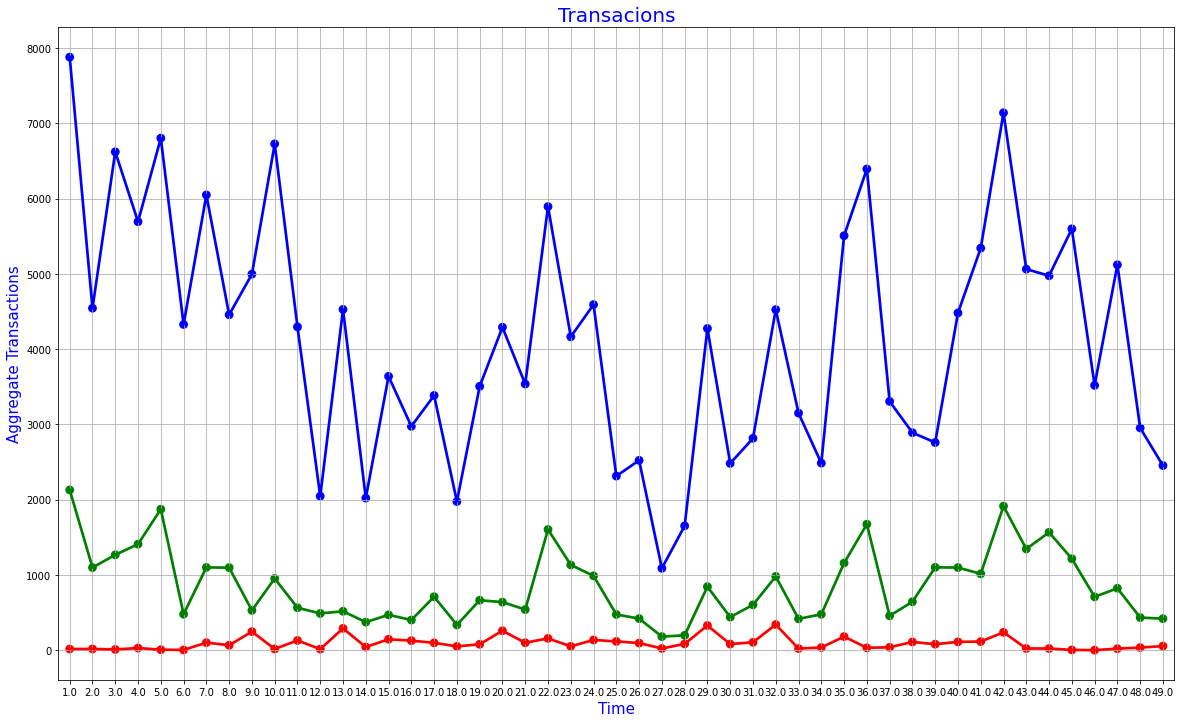

In [130]:
fig,ax1 = plt.subplots(figsize =(20,12))

sns.pointplot(x='time',y='class',data=(df_classes.groupby('time').count()[['class']]).reset_index(),color='blue',alpha=0.8)
sns.pointplot(x='time',y='class',data=((df_classes[df_classes['class'] == '2']).groupby('time').count()[['class']]).reset_index(),color='green',alpha=0.8)
sns.pointplot(x='time',y='class',data=((df_classes[df_classes['class'] == '1']).groupby('time').count()[['class']]).reset_index(),color='red',alpha=0.8)

plt.xlabel('Time',fontsize = 15,color='blue')
plt.ylabel('Aggregate Transactions',fontsize = 15,color='blue')
plt.title('Transacions',fontsize = 20,color='blue')
plt.grid()
plt.show()

plt.show()
